# 🚀 Notebook 5: Transformer e Large Language Models (LLM)

**Benvenuti nell'era moderna dell'AI Generativa!** ⚡

## 🎯 Obiettivi di questo notebook:
- Comprendere la rivoluzione dei Transformer
- Esplorare il meccanismo di Self-Attention
- Implementare un Transformer semplificato
- Capire l'architettura dei Large Language Models
- Sperimentare con modelli pre-addestrati
- Esplorare diverse strategie di generazione
- Applicare LLM a problemi reali

## ⏱️ Tempo stimato: 120-150 minuti

## 📋 Prerequisiti: 
- Notebook 1-4 completati
- Comprensione di RNN e loro limitazioni
- Familiarità con attention mechanisms (base)

## 🔧 Setup e Installazione

Installiamo le librerie necessarie per lavorare con i Transformer:

In [1]:
# Installiamo le librerie necessarie
!pip install transformers torch torchvision torchaudio
!pip install tensorflow keras numpy matplotlib seaborn pandas plotly
!pip install scikit-learn nltk wordcloud datasets
!pip install accelerate sentencepiece

# Importiamo le librerie
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter, defaultdict
import re
import random
import math
import warnings
warnings.filterwarnings('ignore')

# TensorFlow e Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

# Transformers (Hugging Face)
from transformers import (
    AutoTokenizer, AutoModel, AutoModelForCausalLM,
    GPT2LMHeadModel, GPT2Tokenizer,
    pipeline, set_seed
)

# PyTorch (per alcuni esempi)
import torch
import torch.nn as nn
import torch.nn.functional as F

# Visualizzazioni
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Configurazione
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)
set_seed(42)

print("✅ Setup completato! Pronti per esplorare i Transformer.")
print(f"🔧 TensorFlow version: {tf.__version__}")
print(f"🔧 PyTorch version: {torch.__version__}")

   ---------------------------------------- 0.0/12.0 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.0 MB 5.6 MB/s eta 0:00:02
   ---------- ----------------------------- 3.1/12.0 MB 8.0 MB/s eta 0:00:02
   ---------------- ----------------------- 5.0/12.0 MB 8.4 MB/s eta 0:00:01
   ----------------------- ---------------- 7.1/12.0 MB 8.9 MB/s eta 0:00:01
   ------------------------------ --------- 9.2/12.0 MB 9.2 MB/s eta 0:00:01
   ------------------------------------- -- 11.3/12.0 MB 9.3 MB/s eta 0:00:01
   ---------------------------------------- 12.0/12.0 MB 9.0 MB/s  0:00:01
   ---------------------------------------- 0.0/564.3 kB ? eta -:--:--
   ---------------------------------------- 564.3/564.3 kB 9.7 MB/s  0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ----------------------- ---------------- 1.6/2.7 MB 7.6 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 7.7 MB/s  0:00:00
   -----------------------

## 🌟 La Rivoluzione dei Transformer

Prima di immergerci nel codice, capiamo perché i Transformer hanno rivoluzionato l'AI:

🌟 LA RIVOLUZIONE DEI TRANSFORMER

📅 TIMELINE STORICA:
   2017: 'Attention Is All You Need' - Nascita dei Transformer
   2018: BERT - Bidirectional Encoder Representations
   2019: GPT-2 - Generative Pre-trained Transformer
   2020: GPT-3 - 175B parametri, breakthrough
   2022: ChatGPT - AI conversazionale mainstream
   2023: GPT-4 - Multimodale, reasoning avanzato
   2024+: Era dei LLM specializzati e multimodali

❌ PROBLEMI DELLE RNN:
   🐌 Elaborazione sequenziale (non parallelizzabile)
   💭 Memoria limitata per sequenze lunghe
   📉 Vanishing gradient problem
   ⏱️ Addestramento lento
   🔄 Difficoltà con dipendenze a lungo raggio

✅ SOLUZIONI DEI TRANSFORMER:
   ⚡ Elaborazione parallela di tutta la sequenza
   🎯 Self-attention per catturare dipendenze globali
   📈 Scalabilità a sequenze molto lunghe
   🚀 Addestramento efficiente su GPU/TPU
   🔗 Connessioni dirette tra qualsiasi posizione


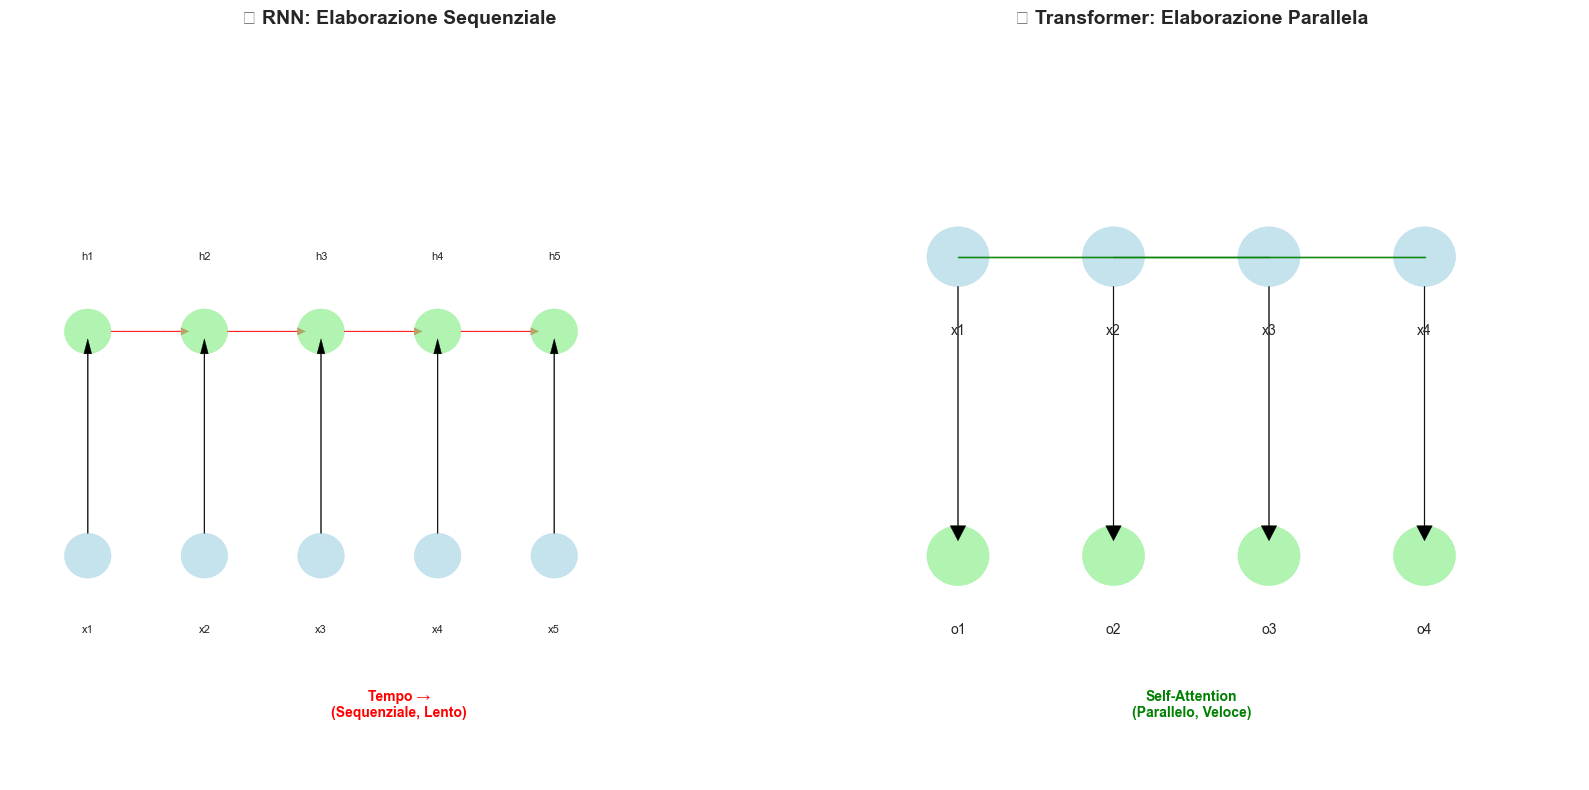


🎯 PRINCIPI CHIAVE DEI TRANSFORMER:
   🔍 Self-Attention: ogni token 'guarda' tutti gli altri
   📍 Positional Encoding: mantiene informazione di posizione
   🔄 Multi-Head Attention: attention parallele specializzate
   🏗️ Encoder-Decoder: architettura modulare
   📚 Pre-training + Fine-tuning: transfer learning

💫 IMPATTO DEI TRANSFORMER:
   🌐 Traduzione automatica di qualità umana
   💬 Chatbot conversazionali avanzati
   📝 Generazione di testo creativo
   🔍 Comprensione del linguaggio naturale
   🎨 AI multimodale (testo + immagini)
   🧠 Reasoning e problem solving

🔮 FUTURO:
   • Modelli sempre più grandi e capaci
   • Specializzazione per domini specifici
   • Integrazione multimodale avanzata
   • Efficienza e sostenibilità
   • AGI (Artificial General Intelligence)?


In [2]:
# La rivoluzione dei Transformer
print("🌟 LA RIVOLUZIONE DEI TRANSFORMER\n")

print("📅 TIMELINE STORICA:")
timeline = [
    ("2017", "'Attention Is All You Need' - Nascita dei Transformer"),
    ("2018", "BERT - Bidirectional Encoder Representations"),
    ("2019", "GPT-2 - Generative Pre-trained Transformer"),
    ("2020", "GPT-3 - 175B parametri, breakthrough"),
    ("2022", "ChatGPT - AI conversazionale mainstream"),
    ("2023", "GPT-4 - Multimodale, reasoning avanzato"),
    ("2024+", "Era dei LLM specializzati e multimodali")
]

for anno, evento in timeline:
    print(f"   {anno}: {evento}")

print("\n❌ PROBLEMI DELLE RNN:")
problemi_rnn = [
    "🐌 Elaborazione sequenziale (non parallelizzabile)",
    "💭 Memoria limitata per sequenze lunghe",
    "📉 Vanishing gradient problem",
    "⏱️ Addestramento lento",
    "🔄 Difficoltà con dipendenze a lungo raggio"
]

for problema in problemi_rnn:
    print(f"   {problema}")

print("\n✅ SOLUZIONI DEI TRANSFORMER:")
soluzioni_transformer = [
    "⚡ Elaborazione parallela di tutta la sequenza",
    "🎯 Self-attention per catturare dipendenze globali",
    "📈 Scalabilità a sequenze molto lunghe",
    "🚀 Addestramento efficiente su GPU/TPU",
    "🔗 Connessioni dirette tra qualsiasi posizione"
]

for soluzione in soluzioni_transformer:
    print(f"   {soluzione}")

# Visualizzazione confronto RNN vs Transformer
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# RNN Processing
ax1.set_title('🔄 RNN: Elaborazione Sequenziale', fontsize=14, fontweight='bold')

# Disegna sequenza RNN
time_steps = 5
for t in range(time_steps):
    x_pos = t * 0.15 + 0.1
    
    # Input
    ax1.add_patch(plt.Circle((x_pos, 0.3), 0.03, color='lightblue', alpha=0.7))
    ax1.text(x_pos, 0.2, f'x{t+1}', ha='center', va='center', fontsize=8)
    
    # Hidden state
    ax1.add_patch(plt.Circle((x_pos, 0.6), 0.03, color='lightgreen', alpha=0.7))
    ax1.text(x_pos, 0.7, f'h{t+1}', ha='center', va='center', fontsize=8)
    
    # Connessioni
    ax1.arrow(x_pos, 0.33, 0, 0.24, head_width=0.01, head_length=0.02, fc='black', ec='black')
    
    # Connessione ricorrente
    if t < time_steps - 1:
        ax1.arrow(x_pos + 0.03, 0.6, 0.09, 0, head_width=0.01, head_length=0.01, 
                 fc='red', ec='red', linestyle='--')

ax1.text(0.5, 0.1, 'Tempo →\n(Sequenziale, Lento)', ha='center', va='center', 
         fontsize=10, fontweight='bold', color='red')
ax1.set_xlim(0, 1)
ax1.set_ylim(0, 1)
ax1.axis('off')

# Transformer Processing
ax2.set_title('⚡ Transformer: Elaborazione Parallela', fontsize=14, fontweight='bold')

# Disegna attention matrix
positions = [(0.2, 0.7), (0.4, 0.7), (0.6, 0.7), (0.8, 0.7)]
labels = ['x1', 'x2', 'x3', 'x4']

# Input tokens
for i, ((x, y), label) in enumerate(zip(positions, labels)):
    ax2.add_patch(plt.Circle((x, y), 0.04, color='lightblue', alpha=0.7))
    ax2.text(x, y-0.1, label, ha='center', va='center', fontsize=10)

# Self-attention connections (tutti con tutti)
for i, (x1, y1) in enumerate(positions):
    for j, (x2, y2) in enumerate(positions):
        if i != j:
            # Linee di attention
            ax2.plot([x1, x2], [y1, y2], 'g-', alpha=0.3, linewidth=1)

# Output
for i, ((x, y), label) in enumerate(zip(positions, labels)):
    ax2.add_patch(plt.Circle((x, 0.3), 0.04, color='lightgreen', alpha=0.7))
    ax2.text(x, 0.2, f'o{i+1}', ha='center', va='center', fontsize=10)
    ax2.arrow(x, y-0.04, 0, -0.32, head_width=0.02, head_length=0.02, fc='black', ec='black')

ax2.text(0.5, 0.1, 'Self-Attention\n(Parallelo, Veloce)', ha='center', va='center', 
         fontsize=10, fontweight='bold', color='green')
ax2.set_xlim(0, 1)
ax2.set_ylim(0, 1)
ax2.axis('off')

plt.tight_layout()
plt.show()

print("\n🎯 PRINCIPI CHIAVE DEI TRANSFORMER:")
principi = [
    "🔍 Self-Attention: ogni token 'guarda' tutti gli altri",
    "📍 Positional Encoding: mantiene informazione di posizione",
    "🔄 Multi-Head Attention: attention parallele specializzate",
    "🏗️ Encoder-Decoder: architettura modulare",
    "📚 Pre-training + Fine-tuning: transfer learning"
]

for principio in principi:
    print(f"   {principio}")

print("\n💫 IMPATTO DEI TRANSFORMER:")
impatti = [
    "🌐 Traduzione automatica di qualità umana",
    "💬 Chatbot conversazionali avanzati",
    "📝 Generazione di testo creativo",
    "🔍 Comprensione del linguaggio naturale",
    "🎨 AI multimodale (testo + immagini)",
    "🧠 Reasoning e problem solving"
]

for impatto in impatti:
    print(f"   {impatto}")

print("\n🔮 FUTURO:")
print("   • Modelli sempre più grandi e capaci")
print("   • Specializzazione per domini specifici")
print("   • Integrazione multimodale avanzata")
print("   • Efficienza e sostenibilità")
print("   • AGI (Artificial General Intelligence)?")

## 🎯 Self-Attention: Il Cuore dei Transformer

Implementiamo il meccanismo di self-attention da zero per capirlo a fondo:

🎯 SELF-ATTENTION: IL CUORE DEI TRANSFORMER

🧪 TEST SELF-ATTENTION:

📝 SEQUENZA: Il gatto dorme felice
📊 INPUT SHAPE: (4, 6) (seq_len=4, d_model=6)

📈 OUTPUT SHAPE: (4, 6)
🎯 ATTENTION WEIGHTS SHAPE: (4, 4)

🔍 ATTENTION WEIGHTS MATRIX:
           Il  gatto  dorme  felice
Il      0.293  0.221  0.270   0.215
gatto   0.177  0.306  0.229   0.287
dorme   0.225  0.238  0.319   0.218
felice  0.176  0.293  0.215   0.317


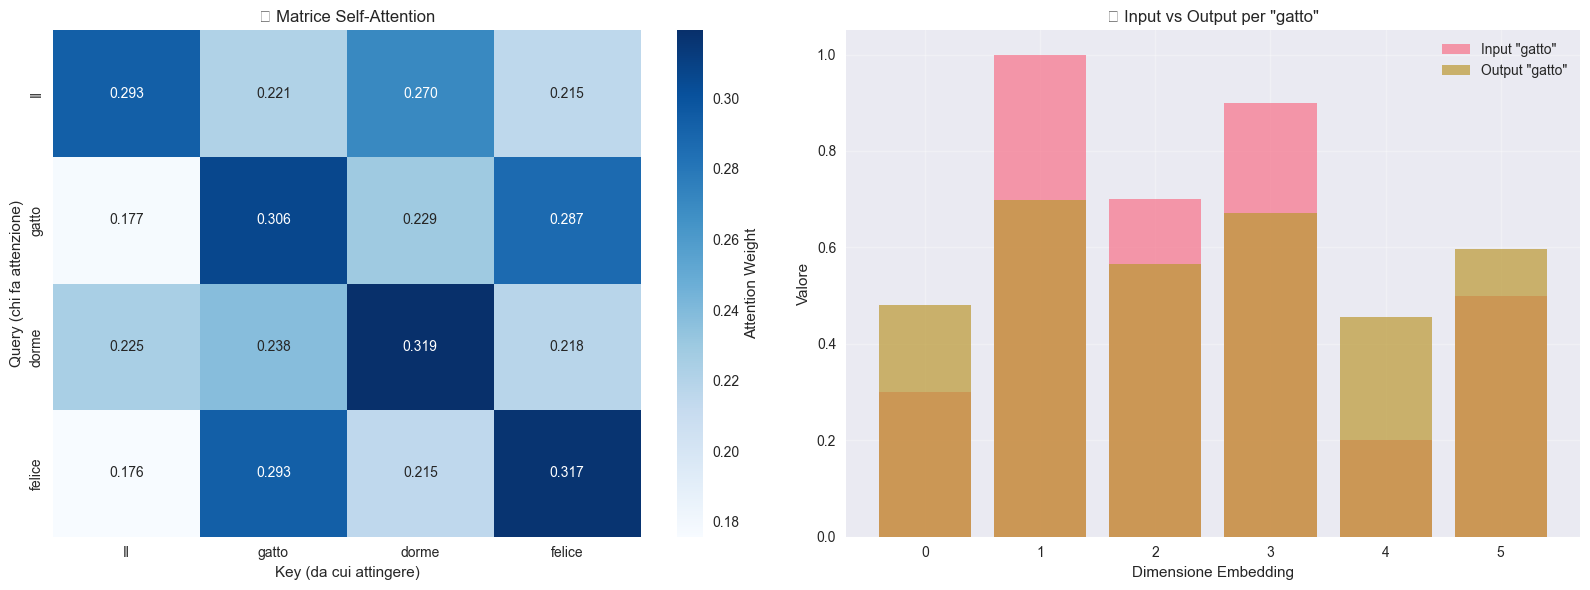


💡 INTERPRETAZIONE:

🔍 Analisi attention per 'gatto':
   Attenzione a 'Il': 0.177
   Attenzione a 'gatto': 0.306
   Attenzione a 'dorme': 0.229
   Attenzione a 'felice': 0.287

🎯 'gatto' fa più attenzione a: 'gatto'

📚 COSA SIGNIFICA:
   • Ogni parola 'guarda' tutte le altre parole
   • I pesi indicano quanto è importante ogni parola
   • L'output è una combinazione pesata di tutte le parole
   • Cattura relazioni semantiche e sintattiche

🔬 FORMULA SELF-ATTENTION:
   Attention(Q,K,V) = softmax(QK^T / √d_k)V
   Dove:
   • Q = Query (cosa cerco?)
   • K = Key (cosa ho?)
   • V = Value (cosa restituisco?)
   • d_k = dimensione delle chiavi (per stabilità numerica)


In [3]:
# Self-Attention Implementation
print("🎯 SELF-ATTENTION: IL CUORE DEI TRANSFORMER\n")

class SelfAttention:
    def __init__(self, d_model):
        """Inizializza Self-Attention
        
        Args:
            d_model: Dimensione del modello (embedding size)
        """
        self.d_model = d_model
        self.d_k = d_model  # Dimensione delle chiavi
        
        # Matrici di trasformazione (semplificato: identità)
        # In pratica, queste sarebbero matrici apprese
        self.W_q = np.eye(d_model)  # Query
        self.W_k = np.eye(d_model)  # Key
        self.W_v = np.eye(d_model)  # Value
    
    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        """Calcola Scaled Dot-Product Attention
        
        Args:
            Q: Query matrix (seq_len, d_k)
            K: Key matrix (seq_len, d_k)
            V: Value matrix (seq_len, d_v)
            mask: Maschera opzionale
        
        Returns:
            output: Output dell'attention
            attention_weights: Pesi di attention
        """
        # Step 1: Calcola scores (Q * K^T)
        scores = np.dot(Q, K.T)
        
        # Step 2: Scala per sqrt(d_k)
        scores = scores / np.sqrt(self.d_k)
        
        # Step 3: Applica maschera se presente
        if mask is not None:
            scores = np.where(mask == 0, -1e9, scores)
        
        # Step 4: Softmax
        attention_weights = self.softmax(scores)
        
        # Step 5: Applica attention ai values
        output = np.dot(attention_weights, V)
        
        return output, attention_weights
    
    def softmax(self, x):
        """Calcola softmax row-wise"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward(self, X):
        """Forward pass dell'attention
        
        Args:
            X: Input embeddings (seq_len, d_model)
        
        Returns:
            output: Output dell'attention
            attention_weights: Pesi di attention
        """
        # Calcola Q, K, V
        Q = np.dot(X, self.W_q)
        K = np.dot(X, self.W_k)
        V = np.dot(X, self.W_v)
        
        # Applica attention
        output, attention_weights = self.scaled_dot_product_attention(Q, K, V)
        
        return output, attention_weights

# Test Self-Attention
print("🧪 TEST SELF-ATTENTION:\n")

# Creiamo una sequenza di esempio
seq_len = 4
d_model = 6

# Embeddings di esempio (rappresentano parole)
# Ogni riga è l'embedding di una parola
X = np.array([
    [1.0, 0.5, 0.2, 0.1, 0.8, 0.3],  # "Il"
    [0.3, 1.0, 0.7, 0.9, 0.2, 0.5],  # "gatto"
    [0.8, 0.2, 1.0, 0.4, 0.6, 0.7],  # "dorme"
    [0.1, 0.9, 0.3, 1.0, 0.4, 0.8]   # "felice"
])

parole = ["Il", "gatto", "dorme", "felice"]

print(f"📝 SEQUENZA: {' '.join(parole)}")
print(f"📊 INPUT SHAPE: {X.shape} (seq_len={seq_len}, d_model={d_model})")

# Inizializza self-attention
attention = SelfAttention(d_model)

# Forward pass
output, attention_weights = attention.forward(X)

print(f"\n📈 OUTPUT SHAPE: {output.shape}")
print(f"🎯 ATTENTION WEIGHTS SHAPE: {attention_weights.shape}")

# Visualizza attention weights
print("\n🔍 ATTENTION WEIGHTS MATRIX:")
df_attention = pd.DataFrame(attention_weights, 
                           index=parole, 
                           columns=parole)
print(df_attention.round(3))

# Visualizzazione grafica
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Heatmap attention weights
sns.heatmap(attention_weights, 
            xticklabels=parole, 
            yticklabels=parole,
            annot=True, fmt='.3f', 
            cmap='Blues', ax=ax1,
            cbar_kws={'label': 'Attention Weight'})
ax1.set_title('🎯 Matrice Self-Attention')
ax1.set_xlabel('Key (da cui attingere)')
ax1.set_ylabel('Query (chi fa attenzione)')

# Confronto input vs output per una parola
parola_focus = 1  # "gatto"
ax2.bar(range(d_model), X[parola_focus], alpha=0.7, label=f'Input "{parole[parola_focus]}"')
ax2.bar(range(d_model), output[parola_focus], alpha=0.7, label=f'Output "{parole[parola_focus]}"')
ax2.set_title(f'📊 Input vs Output per "{parole[parola_focus]}"')
ax2.set_xlabel('Dimensione Embedding')
ax2.set_ylabel('Valore')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 INTERPRETAZIONE:")
print(f"\n🔍 Analisi attention per '{parole[parola_focus]}':")
for i, parola in enumerate(parole):
    weight = attention_weights[parola_focus, i]
    print(f"   Attenzione a '{parola}': {weight:.3f}")

# Trova la parola con maggiore attention
max_attention_idx = np.argmax(attention_weights[parola_focus])
print(f"\n🎯 '{parole[parola_focus]}' fa più attenzione a: '{parole[max_attention_idx]}'")

print("\n📚 COSA SIGNIFICA:")
print("   • Ogni parola 'guarda' tutte le altre parole")
print("   • I pesi indicano quanto è importante ogni parola")
print("   • L'output è una combinazione pesata di tutte le parole")
print("   • Cattura relazioni semantiche e sintattiche")

print("\n🔬 FORMULA SELF-ATTENTION:")
print("   Attention(Q,K,V) = softmax(QK^T / √d_k)V")
print("   Dove:")
print("   • Q = Query (cosa cerco?)")
print("   • K = Key (cosa ho?)")
print("   • V = Value (cosa restituisco?)")
print("   • d_k = dimensione delle chiavi (per stabilità numerica)")

## 🏗️ Multi-Head Attention

I Transformer usano **Multi-Head Attention** per catturare diversi tipi di relazioni:

🏗️ MULTI-HEAD ATTENTION

🧪 TEST MULTI-HEAD ATTENTION:

📊 CONFIGURAZIONE:
   d_model: 8
   num_heads: 2
   d_k per testa: 4
   Sequenza: Il gatto nero dorme

📈 RISULTATI:
   Input shape: (4, 8)
   Output shape: (4, 8)
   Numero teste: 2


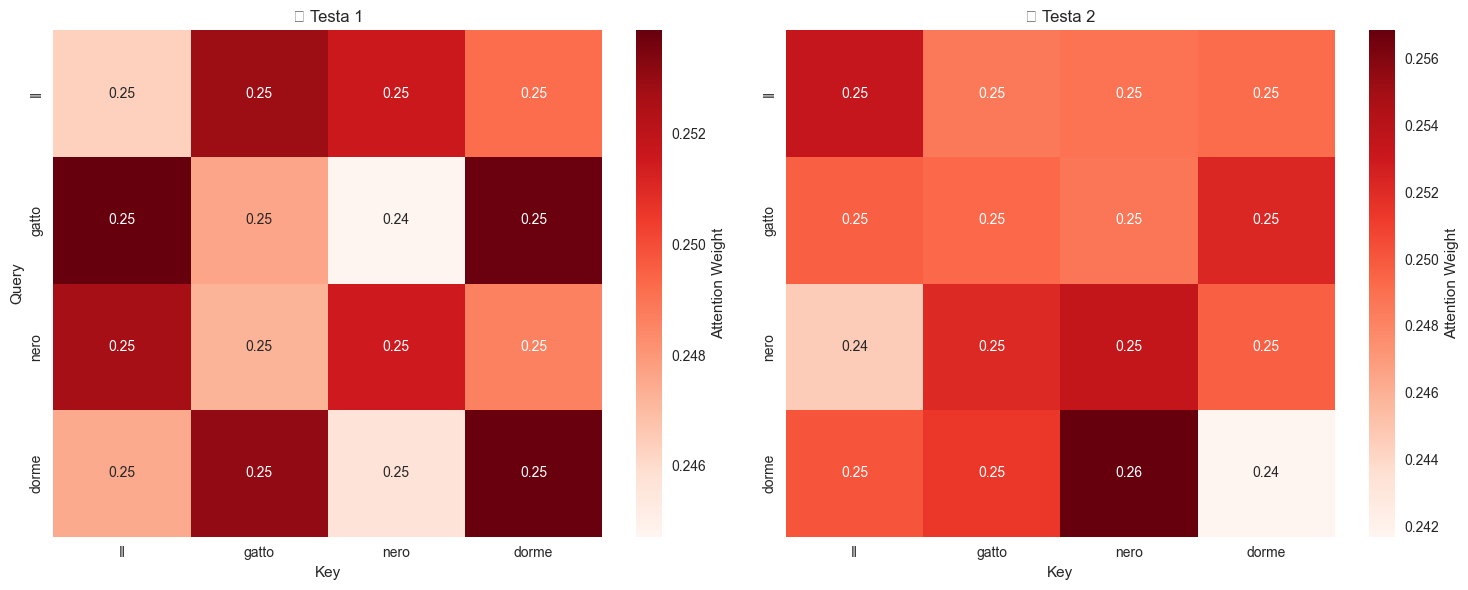


🔍 ANALISI DELLE TESTE:

🎯 Testa 1:
   Connessione più forte: 'gatto' → 'Il' (0.254)
   Parola più 'attenta': 'Il' (avg: 0.250)

🎯 Testa 2:
   Connessione più forte: 'dorme' → 'nero' (0.257)
   Parola più 'attenta': 'Il' (avg: 0.250)

💡 VANTAGGI MULTI-HEAD:
   🎭 Diverse teste catturano diversi tipi di relazioni
   📍 Una testa può focalizzarsi su sintassi, un'altra su semantica
   🔄 Parallelizzazione efficiente
   🎯 Maggiore capacità espressiva
   🔍 Ridondanza e robustezza

🔬 ESEMPI DI SPECIALIZZAZIONE:
   • Testa 1: Relazioni sintattiche (soggetto-verbo)
   • Testa 2: Relazioni semantiche (aggettivo-nome)
   • Testa 3: Dipendenze a lungo raggio
   • Testa 4: Correference resolution

📐 FORMULA MULTI-HEAD:
   MultiHead(Q,K,V) = Concat(head₁,...,headₕ)W^O
   dove headᵢ = Attention(QWᵢ^Q, KWᵢ^K, VWᵢ^V)


In [4]:
# Multi-Head Attention
print("🏗️ MULTI-HEAD ATTENTION\n")

class MultiHeadAttention:
    def __init__(self, d_model, num_heads):
        """Inizializza Multi-Head Attention
        
        Args:
            d_model: Dimensione del modello
            num_heads: Numero di teste di attention
        """
        assert d_model % num_heads == 0
        
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads  # Dimensione per ogni testa
        
        # Matrici di proiezione per ogni testa
        self.W_q = np.random.randn(num_heads, d_model, self.d_k) * 0.1
        self.W_k = np.random.randn(num_heads, d_model, self.d_k) * 0.1
        self.W_v = np.random.randn(num_heads, d_model, self.d_k) * 0.1
        
        # Matrice di output finale
        self.W_o = np.random.randn(d_model, d_model) * 0.1
    
    def scaled_dot_product_attention(self, Q, K, V):
        """Attention per una singola testa"""
        scores = np.dot(Q, K.T) / np.sqrt(self.d_k)
        attention_weights = self.softmax(scores)
        output = np.dot(attention_weights, V)
        return output, attention_weights
    
    def softmax(self, x):
        """Softmax numericamente stabile"""
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    
    def forward(self, X):
        """Forward pass Multi-Head Attention
        
        Args:
            X: Input (seq_len, d_model)
        
        Returns:
            output: Output finale
            all_attention_weights: Pesi di tutte le teste
        """
        seq_len = X.shape[0]
        head_outputs = []
        all_attention_weights = []
        
        # Processa ogni testa separatamente
        for h in range(self.num_heads):
            # Proietta input per questa testa
            Q_h = np.dot(X, self.W_q[h])  # (seq_len, d_k)
            K_h = np.dot(X, self.W_k[h])  # (seq_len, d_k)
            V_h = np.dot(X, self.W_v[h])  # (seq_len, d_k)
            
            # Calcola attention per questa testa
            head_output, attention_weights = self.scaled_dot_product_attention(Q_h, K_h, V_h)
            
            head_outputs.append(head_output)
            all_attention_weights.append(attention_weights)
        
        # Concatena output di tutte le teste
        concatenated = np.concatenate(head_outputs, axis=1)  # (seq_len, d_model)
        
        # Proiezione finale
        output = np.dot(concatenated, self.W_o)
        
        return output, all_attention_weights

# Test Multi-Head Attention
print("🧪 TEST MULTI-HEAD ATTENTION:\n")

# Parametri
d_model = 8
num_heads = 2
seq_len = 4

# Input di esempio
X_multi = np.random.randn(seq_len, d_model) * 0.5
parole_multi = ["Il", "gatto", "nero", "dorme"]

print(f"📊 CONFIGURAZIONE:")
print(f"   d_model: {d_model}")
print(f"   num_heads: {num_heads}")
print(f"   d_k per testa: {d_model // num_heads}")
print(f"   Sequenza: {' '.join(parole_multi)}")

# Inizializza multi-head attention
mha = MultiHeadAttention(d_model, num_heads)

# Forward pass
output_multi, all_attention_weights = mha.forward(X_multi)

print(f"\n📈 RISULTATI:")
print(f"   Input shape: {X_multi.shape}")
print(f"   Output shape: {output_multi.shape}")
print(f"   Numero teste: {len(all_attention_weights)}")

# Visualizza attention weights per ogni testa
fig, axes = plt.subplots(1, num_heads, figsize=(15, 6))
if num_heads == 1:
    axes = [axes]

for h in range(num_heads):
    sns.heatmap(all_attention_weights[h],
                xticklabels=parole_multi,
                yticklabels=parole_multi,
                annot=True, fmt='.2f',
                cmap='Reds', ax=axes[h],
                cbar_kws={'label': 'Attention Weight'})
    axes[h].set_title(f'🎯 Testa {h+1}')
    axes[h].set_xlabel('Key')
    if h == 0:
        axes[h].set_ylabel('Query')

plt.tight_layout()
plt.show()

# Analisi delle diverse teste
print("\n🔍 ANALISI DELLE TESTE:")
for h in range(num_heads):
    print(f"\n🎯 Testa {h+1}:")
    attention_matrix = all_attention_weights[h]
    
    # Trova le connessioni più forti
    max_positions = np.unravel_index(np.argmax(attention_matrix), attention_matrix.shape)
    max_value = attention_matrix[max_positions]
    
    print(f"   Connessione più forte: '{parole_multi[max_positions[0]]}' → '{parole_multi[max_positions[1]]}' ({max_value:.3f})")
    
    # Media attention per ogni parola
    avg_attention = np.mean(attention_matrix, axis=1)
    most_attended = np.argmax(avg_attention)
    print(f"   Parola più 'attenta': '{parole_multi[most_attended]}' (avg: {avg_attention[most_attended]:.3f})")

print("\n💡 VANTAGGI MULTI-HEAD:")
vantaggi_mh = [
    "🎭 Diverse teste catturano diversi tipi di relazioni",
    "📍 Una testa può focalizzarsi su sintassi, un'altra su semantica",
    "🔄 Parallelizzazione efficiente",
    "🎯 Maggiore capacità espressiva",
    "🔍 Ridondanza e robustezza"
]

for vantaggio in vantaggi_mh:
    print(f"   {vantaggio}")

print("\n🔬 ESEMPI DI SPECIALIZZAZIONE:")
print("   • Testa 1: Relazioni sintattiche (soggetto-verbo)")
print("   • Testa 2: Relazioni semantiche (aggettivo-nome)")
print("   • Testa 3: Dipendenze a lungo raggio")
print("   • Testa 4: Correference resolution")

print("\n📐 FORMULA MULTI-HEAD:")
print("   MultiHead(Q,K,V) = Concat(head₁,...,headₕ)W^O")
print("   dove headᵢ = Attention(QWᵢ^Q, KWᵢ^K, VWᵢ^V)")

## 🏛️ Architettura Transformer Completa

Ora costruiamo un Transformer semplificato ma completo:

🏛️ ARCHITETTURA TRANSFORMER COMPLETA

🧪 TEST TRANSFORMER COMPLETO:

📊 CONFIGURAZIONE TRANSFORMER:
   Vocab size: 1,000
   Model dimension: 128
   Attention heads: 8
   Layers: 4
   FFN dimension: 512
   Max sequence length: 100

🔍 TEST INPUT:
   Shape: (2, 10)
   Sample: [687 289 761 786 692]...

📈 OUTPUT:
   Shape: (2, 10, 1000)
   Interpretazione: (batch_size, seq_len, vocab_size)

🔢 PARAMETRI TOTALI: 1,050,088

🏗️ ARCHITETTURA:


Model: "simple_transformer"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (2, 10, 128)                │         128,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ positional_encoding                  │ ?                           │               0 │
│ (PositionalEncoding)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block (TransformerBlock) │ ?                           │         198,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_1                  │ ?                           │         198,272 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_2                  │ ?                           │         198,272 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ transformer_block_3                  │ ?                           │         198,272 │
│ (TransformerBlock)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (2, 10, 1000)               │         129,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ ?                           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,050,088 (4.01 MB)

 Trainable params: 1,050,088 (4.01 MB)

 Non-trainable params: 0 (0.00 B)

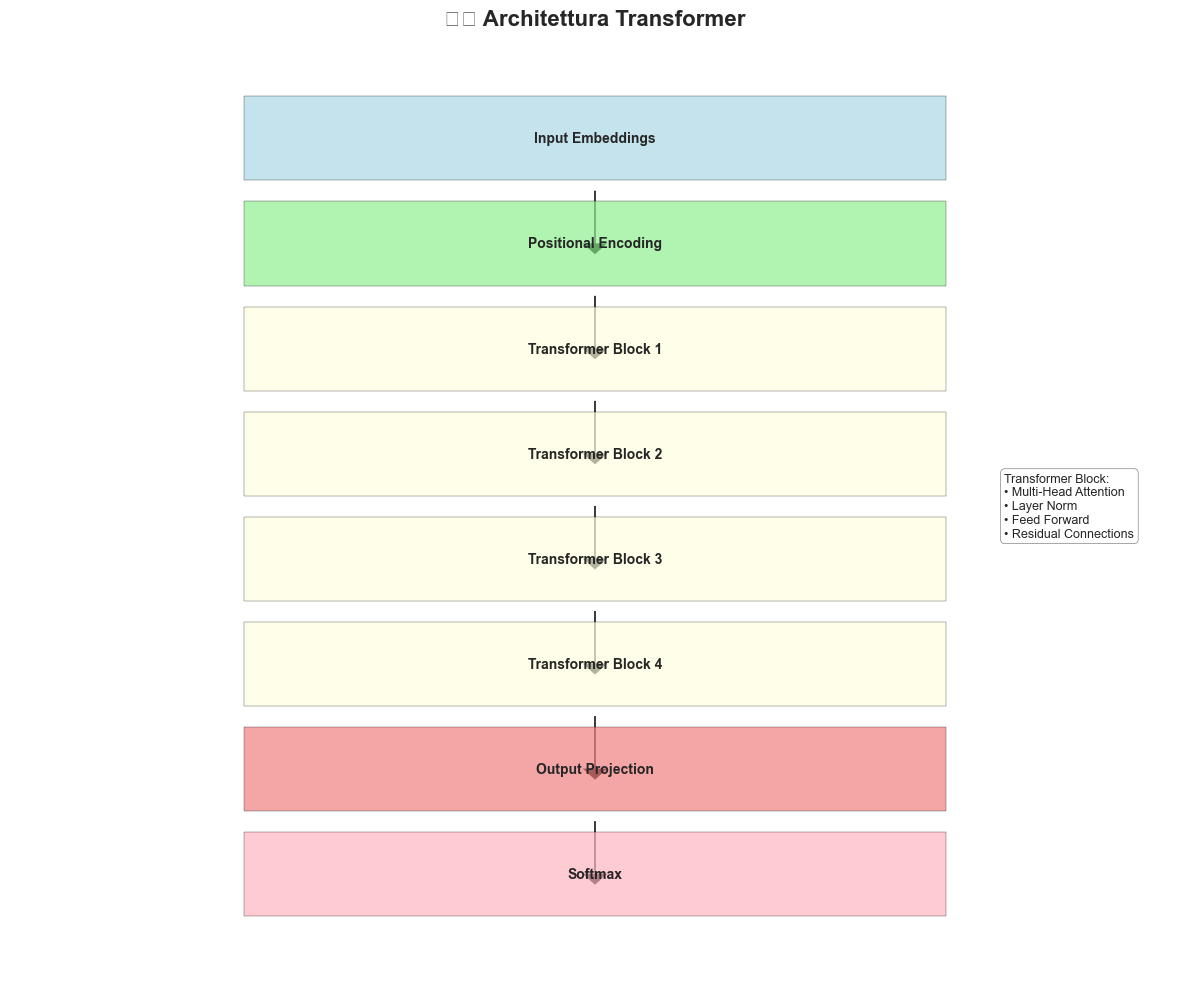


💡 COMPONENTI CHIAVE:
   📝 Input Embeddings: Converte token in vettori densi
   📍 Positional Encoding: Aggiunge informazione di posizione
   🎯 Multi-Head Attention: Cattura relazioni tra token
   🔄 Feed Forward: Trasformazione non-lineare
   🔗 Residual Connections: Facilita il training
   📏 Layer Normalization: Stabilizza il training
   📤 Output Projection: Mappa a vocabolario

🚀 VANTAGGI TRANSFORMER:
   • Parallelizzazione completa
   • Cattura dipendenze a lungo raggio
   • Scalabile a sequenze molto lunghe
   • Transfer learning efficace
   • Architettura modulare e flessibile


In [5]:
# Transformer completo con TensorFlow/Keras
print("🏛️ ARCHITETTURA TRANSFORMER COMPLETA\n")

class PositionalEncoding(layers.Layer):
    """Positional Encoding per Transformer"""
    
    def __init__(self, max_len=5000, d_model=512):
        super().__init__()
        self.d_model = d_model
        
        # Crea matrice di positional encoding
        pe = np.zeros((max_len, d_model))
        position = np.arange(0, max_len)[:, np.newaxis]
        
        div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
        
        pe[:, 0::2] = np.sin(position * div_term)
        pe[:, 1::2] = np.cos(position * div_term)
        
        self.pe = tf.constant(pe, dtype=tf.float32)
    
    def call(self, x):
        seq_len = tf.shape(x)[1]
        return x + self.pe[:seq_len, :]

class TransformerBlock(layers.Layer):
    """Blocco Transformer (Encoder)"""
    
    def __init__(self, d_model, num_heads, dff, dropout_rate=0.1):
        super().__init__()
        self.d_model = d_model
        self.num_heads = num_heads
        
        # Multi-Head Attention
        self.mha = layers.MultiHeadAttention(
            num_heads=num_heads, 
            key_dim=d_model // num_heads,
            dropout=dropout_rate
        )
        
        # Feed Forward Network
        self.ffn = tf.keras.Sequential([
            layers.Dense(dff, activation='relu'),
            layers.Dense(d_model)
        ])
        
        # Layer Normalization
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        
        # Dropout
        self.dropout1 = layers.Dropout(dropout_rate)
        self.dropout2 = layers.Dropout(dropout_rate)
    
    def call(self, x, training=False):
        # Multi-Head Attention + Residual + LayerNorm
        attn_output = self.mha(x, x, x, training=training)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)
        
        # Feed Forward + Residual + LayerNorm
        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)
        
        return out2

class SimpleTransformer(tf.keras.Model):
    """Transformer semplificato per generazione di testo"""
    
    def __init__(self, vocab_size, d_model, num_heads, num_layers, dff, max_len=1000, dropout_rate=0.1):
        super().__init__()
        self.d_model = d_model
        self.vocab_size = vocab_size
        
        # Embedding layer
        self.embedding = layers.Embedding(vocab_size, d_model)
        
        # Positional encoding
        self.pos_encoding = PositionalEncoding(max_len, d_model)
        
        # Transformer blocks
        self.transformer_blocks = [
            TransformerBlock(d_model, num_heads, dff, dropout_rate)
            for _ in range(num_layers)
        ]
        
        # Output layer
        self.final_layer = layers.Dense(vocab_size)
        
        # Dropout
        self.dropout = layers.Dropout(dropout_rate)
    
    def call(self, x, training=False):
        seq_len = tf.shape(x)[1]
        
        # Embedding + scaling
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        
        # Positional encoding
        x = self.pos_encoding(x)
        x = self.dropout(x, training=training)
        
        # Transformer blocks
        for transformer_block in self.transformer_blocks:
            x = transformer_block(x, training=training)
        
        # Output projection
        output = self.final_layer(x)
        
        return output

# Test del Transformer
print("🧪 TEST TRANSFORMER COMPLETO:\n")

# Parametri del modello
vocab_size = 1000
d_model = 128
num_heads = 8
num_layers = 4
dff = 512
max_len = 100
dropout_rate = 0.1

print(f"📊 CONFIGURAZIONE TRANSFORMER:")
print(f"   Vocab size: {vocab_size:,}")
print(f"   Model dimension: {d_model}")
print(f"   Attention heads: {num_heads}")
print(f"   Layers: {num_layers}")
print(f"   FFN dimension: {dff}")
print(f"   Max sequence length: {max_len}")

# Crea il modello
transformer = SimpleTransformer(
    vocab_size=vocab_size,
    d_model=d_model,
    num_heads=num_heads,
    num_layers=num_layers,
    dff=dff,
    max_len=max_len,
    dropout_rate=dropout_rate
)

# Input di test
batch_size = 2
seq_len = 10
test_input = tf.random.uniform((batch_size, seq_len), maxval=vocab_size, dtype=tf.int32)

print(f"\n🔍 TEST INPUT:")
print(f"   Shape: {test_input.shape}")
print(f"   Sample: {test_input[0].numpy()[:5]}...")

# Forward pass
output = transformer(test_input, training=False)

print(f"\n📈 OUTPUT:")
print(f"   Shape: {output.shape}")
print(f"   Interpretazione: (batch_size, seq_len, vocab_size)")

# Conta parametri
total_params = transformer.count_params()
print(f"\n🔢 PARAMETRI TOTALI: {total_params:,}")

# Visualizza architettura
print("\n🏗️ ARCHITETTURA:")
transformer.build(input_shape=(None, seq_len))
transformer.summary()

# Visualizzazione dell'architettura
fig, ax = plt.subplots(figsize=(12, 10))

# Disegna i componenti del Transformer
components = [
    ("Input Embeddings", 0.9, "lightblue"),
    ("Positional Encoding", 0.8, "lightgreen"),
    ("Transformer Block 1", 0.7, "lightyellow"),
    ("Transformer Block 2", 0.6, "lightyellow"),
    ("Transformer Block 3", 0.5, "lightyellow"),
    ("Transformer Block 4", 0.4, "lightyellow"),
    ("Output Projection", 0.3, "lightcoral"),
    ("Softmax", 0.2, "lightpink")
]

for i, (name, y_pos, color) in enumerate(components):
    # Rettangolo per il componente
    rect = plt.Rectangle((0.2, y_pos-0.04), 0.6, 0.08, 
                        facecolor=color, edgecolor='black', alpha=0.7)
    ax.add_patch(rect)
    
    # Testo
    ax.text(0.5, y_pos, name, ha='center', va='center', 
           fontsize=10, fontweight='bold')
    
    # Freccia verso il basso (tranne per l'ultimo)
    if i < len(components) - 1:
        ax.arrow(0.5, y_pos-0.05, 0, -0.05, head_width=0.02, head_length=0.01, 
                fc='black', ec='black')

# Dettagli Transformer Block
ax.text(0.85, 0.55, 'Transformer Block:\n• Multi-Head Attention\n• Layer Norm\n• Feed Forward\n• Residual Connections', 
        ha='left', va='center', fontsize=9,
        bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.8))

ax.set_xlim(0, 1)
ax.set_ylim(0.1, 1)
ax.axis('off')
ax.set_title('🏛️ Architettura Transformer', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 COMPONENTI CHIAVE:")
componenti = [
    "📝 Input Embeddings: Converte token in vettori densi",
    "📍 Positional Encoding: Aggiunge informazione di posizione",
    "🎯 Multi-Head Attention: Cattura relazioni tra token",
    "🔄 Feed Forward: Trasformazione non-lineare",
    "🔗 Residual Connections: Facilita il training",
    "📏 Layer Normalization: Stabilizza il training",
    "📤 Output Projection: Mappa a vocabolario"
]

for componente in componenti:
    print(f"   {componente}")

print("\n🚀 VANTAGGI TRANSFORMER:")
print("   • Parallelizzazione completa")
print("   • Cattura dipendenze a lungo raggio")
print("   • Scalabile a sequenze molto lunghe")
print("   • Transfer learning efficace")
print("   • Architettura modulare e flessibile")

## 🤖 Large Language Models (LLM)

Ora esploriamo i Large Language Models e come utilizzarli:

🤖 LARGE LANGUAGE MODELS (LLM)

📈 EVOLUZIONE DIMENSIONI LLM:
   2018: BERT Base    110M     - Bidirectional encoder
   2019: GPT-2        1.5B     - Autoregressive decoder
   2020: GPT-3        175B     - Few-shot learning
   2021: PaLM         540B     - Scaling laws
   2022: ChatGPT      ~175B    - RLHF tuning
   2023: GPT-4        ~1.7T    - Multimodal
   2024: Claude 3     ~1T+     - Long context

🧠 CARATTERISTICHE LLM MODERNI:
   📊 Miliardi/trilioni di parametri
   📚 Training su enormi corpus di testo
   🎯 Emergent abilities (capacità emergenti)
   🔄 In-context learning (few-shot)
   💬 Conversational abilities
   🧮 Reasoning e problem solving
   🌐 Multilingue e multimodale
   ⚡ Transfer learning efficace

🔬 ESPERIMENTO CON LLM PRE-ADDESTRATO:

📥 Caricamento GPT-2 small...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


✅ Modello caricato con successo!

📊 INFORMAZIONI MODELLO:
   Nome: GPT-2 Small
   Parametri: 124,439,808
   Vocabolario: 50,257 token
   Contesto massimo: 1024 token

🎨 TEST DI GENERAZIONE:

🎯 Prompt 1: 'The future of artificial intelligence is'
   Generazione 1: The future of artificial intelligence is uncertain," said Charles Stadler, president of AI research firm Kaspersky Lab. "It's hard to say what future can come from that
   Generazione 2: The future of artificial intelligence is bound to come down to what happens once it happens. The goal is for it to be able to think what it thinks and it will be able to
--------------------------------------------------------------------------------
🎯 Prompt 2: 'In a world where robots and humans coexist,'
   Generazione 1: In a world where robots and humans coexist, it's hard to imagine a better time for a company like ours to go public. We have a clear path to getting there, and if we can
   Generazione 2: In a world where robots and humans

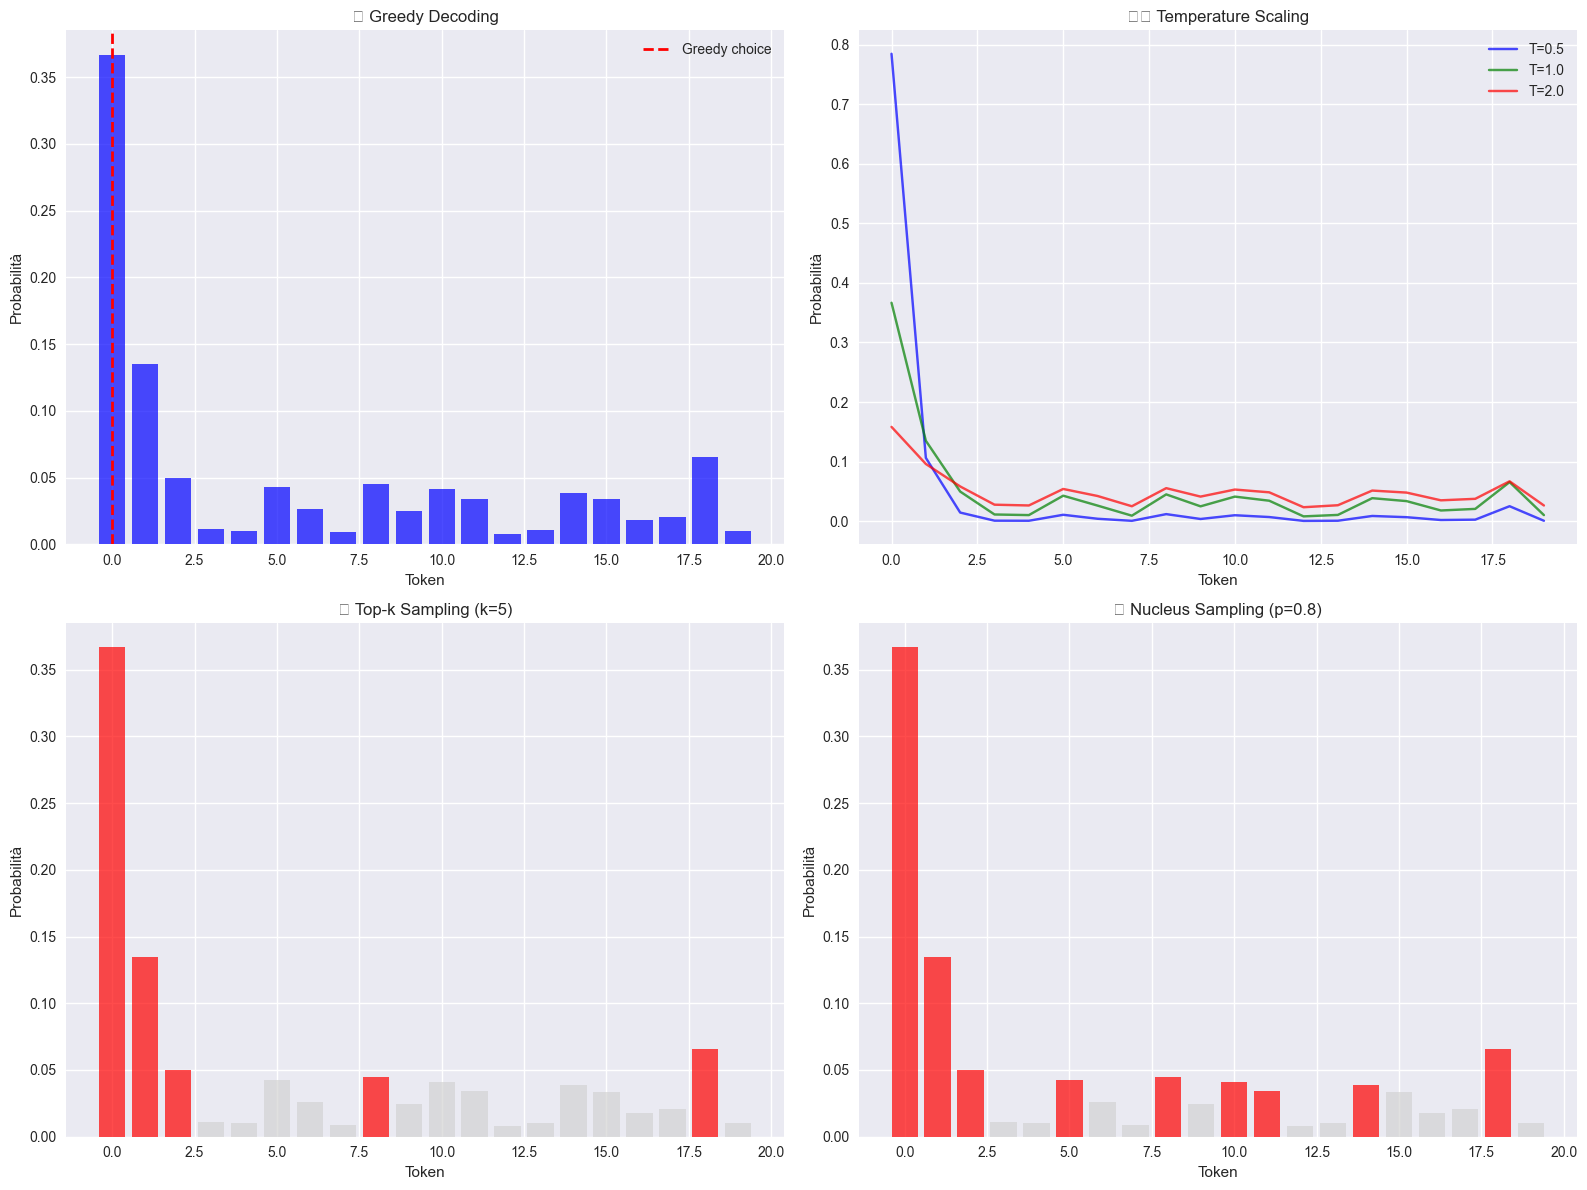


🎛️ CONTROLLO DELLA GENERAZIONE:

🌡️ Temperature:
   • T < 1: Più conservativo, meno creatività
   • T = 1: Distribuzione originale
   • T > 1: Più creativo, meno coerente

🔝 Top-k:
   • k piccolo: Più conservativo
   • k grande: Più diversità

🎪 Top-p (Nucleus):
   • p piccolo: Più conservativo
   • p grande: Più diversità
   • Adattivo: dimensione del nucleus varia


In [6]:
# Large Language Models
print("🤖 LARGE LANGUAGE MODELS (LLM)\n")

print("📈 EVOLUZIONE DIMENSIONI LLM:")
llm_evolution = [
    ("2018", "BERT Base", "110M", "Bidirectional encoder"),
    ("2019", "GPT-2", "1.5B", "Autoregressive decoder"),
    ("2020", "GPT-3", "175B", "Few-shot learning"),
    ("2021", "PaLM", "540B", "Scaling laws"),
    ("2022", "ChatGPT", "~175B", "RLHF tuning"),
    ("2023", "GPT-4", "~1.7T", "Multimodal"),
    ("2024", "Claude 3", "~1T+", "Long context")
]

for anno, nome, params, caratteristica in llm_evolution:
    print(f"   {anno}: {nome:<12} {params:<8} - {caratteristica}")

print("\n🧠 CARATTERISTICHE LLM MODERNI:")
caratteristiche = [
    "📊 Miliardi/trilioni di parametri",
    "📚 Training su enormi corpus di testo",
    "🎯 Emergent abilities (capacità emergenti)",
    "🔄 In-context learning (few-shot)",
    "💬 Conversational abilities",
    "🧮 Reasoning e problem solving",
    "🌐 Multilingue e multimodale",
    "⚡ Transfer learning efficace"
]

for caratteristica in caratteristiche:
    print(f"   {caratteristica}")

# Utilizzo di un LLM pre-addestrato
print("\n🔬 ESPERIMENTO CON LLM PRE-ADDESTRATO:\n")

try:
    # Carica un modello GPT-2 piccolo per demo
    print("📥 Caricamento GPT-2 small...")
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    model = GPT2LMHeadModel.from_pretrained('gpt2')
    
    # Aggiungi pad token se non presente
    if tokenizer.pad_token is None:
        tokenizer.pad_token = tokenizer.eos_token
    
    print("✅ Modello caricato con successo!")
    
    # Informazioni sul modello
    num_params = sum(p.numel() for p in model.parameters())
    print(f"\n📊 INFORMAZIONI MODELLO:")
    print(f"   Nome: GPT-2 Small")
    print(f"   Parametri: {num_params:,}")
    print(f"   Vocabolario: {len(tokenizer):,} token")
    print(f"   Contesto massimo: {tokenizer.model_max_length} token")
    
    # Test di generazione
    print("\n🎨 TEST DI GENERAZIONE:\n")
    
    prompts = [
        "The future of artificial intelligence is",
        "In a world where robots and humans coexist,",
        "The most important discovery in science was"
    ]
    
    for i, prompt in enumerate(prompts, 1):
        print(f"🎯 Prompt {i}: '{prompt}'")
        
        # Tokenizza input
        inputs = tokenizer.encode(prompt, return_tensors='pt')
        
        # Genera testo
        with torch.no_grad():
            outputs = model.generate(
                inputs,
                max_length=inputs.shape[1] + 30,
                num_return_sequences=2,
                temperature=0.8,
                do_sample=True,
                pad_token_id=tokenizer.eos_token_id
            )
        
        # Decodifica risultati
        for j, output in enumerate(outputs):
            generated_text = tokenizer.decode(output, skip_special_tokens=True)
            print(f"   Generazione {j+1}: {generated_text}")
        
        print("-" * 80)
    
except Exception as e:
    print(f"⚠️ Errore nel caricamento del modello: {e}")
    print("💡 Questo può accadere per limitazioni di memoria o connessione")

# Pipeline di Hugging Face (alternativa più semplice)
print("\n🔧 UTILIZZO CON PIPELINE:\n")

try:
    # Crea pipeline per generazione testo
    generator = pipeline('text-generation', model='gpt2', tokenizer='gpt2')
    
    print("📝 GENERAZIONE CON PIPELINE:")
    
    test_prompts = [
        "Artificial intelligence will",
        "The benefits of machine learning include"
    ]
    
    for prompt in test_prompts:
        print(f"\n🎯 Prompt: '{prompt}'")
        
        results = generator(
            prompt,
            max_length=50,
            num_return_sequences=2,
            temperature=0.7,
            do_sample=True
        )
        
        for i, result in enumerate(results, 1):
            print(f"   {i}. {result['generated_text']}")
    
except Exception as e:
    print(f"⚠️ Pipeline non disponibile: {e}")

print("\n💡 STRATEGIE DI GENERAZIONE:")
strategie = [
    "🎯 Greedy Decoding: Sempre il token più probabile",
    "🔍 Beam Search: Mantiene top-k sequenze",
    "🎲 Sampling: Campiona dalla distribuzione",
    "🌡️ Temperature: Controlla la creatività",
    "🔝 Top-k Sampling: Limita ai k token più probabili",
    "🎪 Nucleus (Top-p): Campiona dalla massa di probabilità p"
]

for strategia in strategie:
    print(f"   {strategia}")

# Visualizzazione strategie di generazione
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Simulazione distribuzione di probabilità
vocab_size = 20
logits = np.random.randn(vocab_size)
logits[0] = 3  # Token più probabile
logits[1] = 2
logits[2] = 1

# Softmax per ottenere probabilità
probs = np.exp(logits) / np.sum(np.exp(logits))
tokens = [f'token_{i}' for i in range(vocab_size)]

# Greedy
ax1.bar(range(vocab_size), probs, alpha=0.7, color='blue')
ax1.axvline(x=np.argmax(probs), color='red', linestyle='--', linewidth=2, label='Greedy choice')
ax1.set_title('🎯 Greedy Decoding')
ax1.set_xlabel('Token')
ax1.set_ylabel('Probabilità')
ax1.legend()

# Temperature scaling
temperatures = [0.5, 1.0, 2.0]
colors = ['blue', 'green', 'red']

for temp, color in zip(temperatures, colors):
    temp_probs = np.exp(logits / temp) / np.sum(np.exp(logits / temp))
    ax2.plot(range(vocab_size), temp_probs, alpha=0.7, color=color, label=f'T={temp}')

ax2.set_title('🌡️ Temperature Scaling')
ax2.set_xlabel('Token')
ax2.set_ylabel('Probabilità')
ax2.legend()

# Top-k sampling
k = 5
top_k_indices = np.argsort(probs)[-k:]
colors = ['red' if i in top_k_indices else 'lightgray' for i in range(vocab_size)]

ax3.bar(range(vocab_size), probs, alpha=0.7, color=colors)
ax3.set_title(f'🔝 Top-k Sampling (k={k})')
ax3.set_xlabel('Token')
ax3.set_ylabel('Probabilità')

# Top-p (nucleus) sampling
p = 0.8
sorted_indices = np.argsort(probs)[::-1]
cumsum_probs = np.cumsum(probs[sorted_indices])
nucleus_size = np.sum(cumsum_probs <= p) + 1

colors = ['red' if i in sorted_indices[:nucleus_size] else 'lightgray' for i in range(vocab_size)]
ax4.bar(range(vocab_size), probs, alpha=0.7, color=colors)
ax4.set_title(f'🎪 Nucleus Sampling (p={p})')
ax4.set_xlabel('Token')
ax4.set_ylabel('Probabilità')

plt.tight_layout()
plt.show()

print("\n🎛️ CONTROLLO DELLA GENERAZIONE:")
print("\n🌡️ Temperature:")
print("   • T < 1: Più conservativo, meno creatività")
print("   • T = 1: Distribuzione originale")
print("   • T > 1: Più creativo, meno coerente")

print("\n🔝 Top-k:")
print("   • k piccolo: Più conservativo")
print("   • k grande: Più diversità")

print("\n🎪 Top-p (Nucleus):")
print("   • p piccolo: Più conservativo")
print("   • p grande: Più diversità")
print("   • Adattivo: dimensione del nucleus varia")

## 🎯 Applicazioni Pratiche degli LLM

Esploriamo diverse applicazioni pratiche dei Large Language Models:

🎯 APPLICAZIONI PRATICHE DEGLI LLM

🧪 DEMO APPLICAZIONI LLM:

1️⃣ TEXT COMPLETION:
   Prompt: 'The future of AI is'
   Completion: bright and full of possibilities. We can expect significant advances in healthcare, education, and scientific research.

   Prompt: 'Machine learning helps us'
   Completion: solve complex problems by finding patterns in data that humans might miss.

2️⃣ SUMMARIZATION:
   Original (373 chars): Artificial intelligence (AI) is transforming industries worldwide. 
From healthcare to finance, AI s...
   Summary: The text discusses artificial intelligence, its applications, and potential impact on society.

3️⃣ TRANSLATION:
   EN: Hello, how are you? → Italian: Ciao, come stai?
   EN: Good morning → Spanish: Buenos días

4️⃣ QUESTION ANSWERING:
   Context: Transformers are neural networks that use attention mechanisms.
   Question: What are transformers?
   Answer: Transformers are a type of neural network architecture that uses self-attention mechanisms.

5️⃣ COD

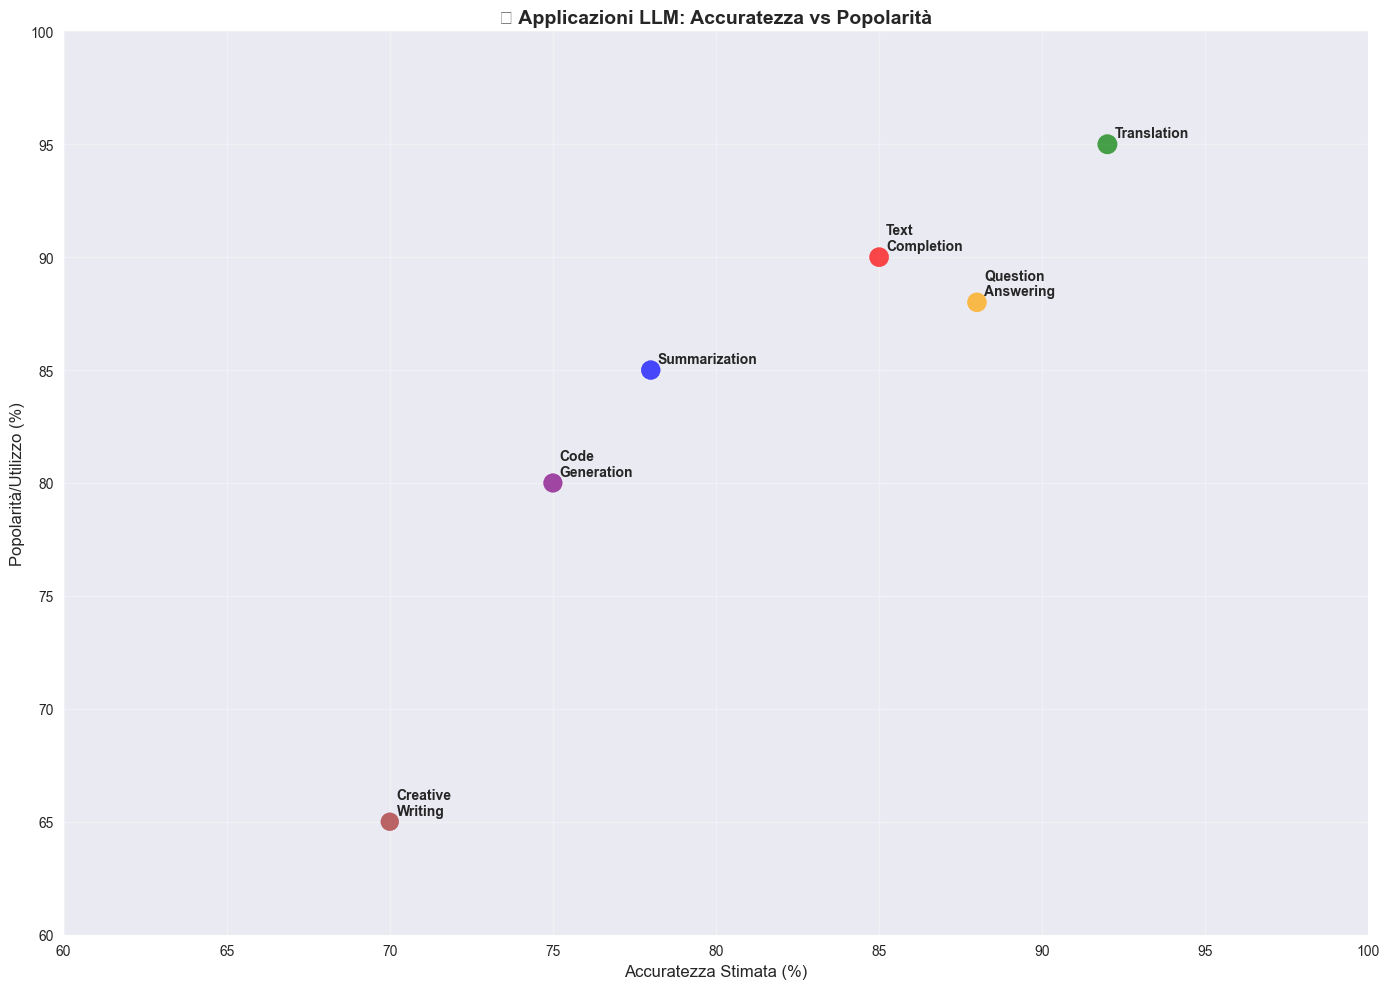

📊 SETTORI DI APPLICAZIONE:

🏥 Healthcare:
   • Diagnosi assistita
   • Analisi letteratura medica
   • Documentazione clinica

🎓 Education:
   • Tutoring personalizzato
   • Generazione contenuti
   • Valutazione automatica

💼 Business:
   • Analisi documenti
   • Customer service
   • Report automatici

⚖️ Legal:
   • Ricerca giuridica
   • Analisi contratti
   • Documentazione legale

🔬 Research:
   • Literature review
   • Hypothesis generation
   • Data analysis

🎨 Creative:
   • Scrittura creativa
   • Brainstorming
   • Content creation

💡 CONSIDERAZIONI PRATICHE:
   🎯 Prompt Engineering: La qualità dell'input determina l'output
   🔍 Fact-checking: Sempre verificare informazioni fattuali
   ⚖️ Bias: Essere consapevoli di possibili pregiudizi
   🔒 Privacy: Attenzione ai dati sensibili
   💰 Costi: Considerare i costi di utilizzo API
   ⚡ Latenza: Tempo di risposta per applicazioni real-time
   📏 Limiti: Lunghezza massima del contesto
   🔄 Aggiornamento: Modelli possono essere datat

In [7]:
# Applicazioni pratiche degli LLM
print("🎯 APPLICAZIONI PRATICHE DEGLI LLM\n")

# Simuliamo diverse applicazioni
class LLMApplications:
    def __init__(self):
        self.applications = {
            'text_completion': self.text_completion,
            'summarization': self.summarization,
            'translation': self.translation,
            'question_answering': self.question_answering,
            'code_generation': self.code_generation,
            'creative_writing': self.creative_writing
        }
    
    def text_completion(self, prompt):
        """Simulazione completamento testo"""
        completions = {
            "The future of AI is": "bright and full of possibilities. We can expect significant advances in healthcare, education, and scientific research.",
            "Machine learning helps us": "solve complex problems by finding patterns in data that humans might miss.",
            "In the next decade": "we will see AI become more integrated into our daily lives, making many tasks more efficient."
        }
        return completions.get(prompt, "[Generated completion would appear here]")
    
    def summarization(self, text):
        """Simulazione riassunto"""
        if "artificial intelligence" in text.lower():
            return "Summary: The text discusses artificial intelligence, its applications, and potential impact on society."
        return "Summary: [AI-generated summary would appear here]"
    
    def translation(self, text, target_lang):
        """Simulazione traduzione"""
        translations = {
            ("Hello, how are you?", "italian"): "Ciao, come stai?",
            ("Good morning", "spanish"): "Buenos días",
            ("Thank you", "french"): "Merci"
        }
        return translations.get((text, target_lang), f"[Translation to {target_lang}: {text}]")
    
    def question_answering(self, context, question):
        """Simulazione Q&A"""
        if "transformer" in question.lower():
            return "Transformers are a type of neural network architecture that uses self-attention mechanisms."
        return "[AI-generated answer based on context]"
    
    def code_generation(self, description):
        """Simulazione generazione codice"""
        if "fibonacci" in description.lower():
            return '''def fibonacci(n):
    if n <= 1:
        return n
    return fibonacci(n-1) + fibonacci(n-2)'''
        return "# [AI-generated code would appear here]"
    
    def creative_writing(self, prompt):
        """Simulazione scrittura creativa"""
        stories = {
            "space adventure": "Captain Sarah gazed out at the swirling nebula, knowing that beyond those cosmic clouds lay the answer to humanity's greatest question...",
            "mystery": "The old mansion creaked in the wind, its windows dark except for one flickering light in the tower room..."
        }
        return stories.get(prompt, "[Creative story would be generated here]")

# Test delle applicazioni
llm_apps = LLMApplications()

print("🧪 DEMO APPLICAZIONI LLM:\n")

# 1. Text Completion
print("1️⃣ TEXT COMPLETION:")
prompts = ["The future of AI is", "Machine learning helps us"]
for prompt in prompts:
    completion = llm_apps.text_completion(prompt)
    print(f"   Prompt: '{prompt}'")
    print(f"   Completion: {completion}")
    print()

# 2. Summarization
print("2️⃣ SUMMARIZATION:")
long_text = """Artificial intelligence (AI) is transforming industries worldwide. 
From healthcare to finance, AI systems are helping professionals make better decisions, 
automate routine tasks, and discover new insights from data. Machine learning algorithms 
can process vast amounts of information quickly and accurately, leading to improved 
efficiency and innovation across sectors."""

summary = llm_apps.summarization(long_text)
print(f"   Original ({len(long_text)} chars): {long_text[:100]}...")
print(f"   {summary}")
print()

# 3. Translation
print("3️⃣ TRANSLATION:")
translations = [
    ("Hello, how are you?", "italian"),
    ("Good morning", "spanish")
]
for text, lang in translations:
    translated = llm_apps.translation(text, lang)
    print(f"   EN: {text} → {lang.title()}: {translated}")
print()

# 4. Question Answering
print("4️⃣ QUESTION ANSWERING:")
context = "Transformers are neural networks that use attention mechanisms."
question = "What are transformers?"
answer = llm_apps.question_answering(context, question)
print(f"   Context: {context}")
print(f"   Question: {question}")
print(f"   Answer: {answer}")
print()

# 5. Code Generation
print("5️⃣ CODE GENERATION:")
code_request = "Write a fibonacci function"
generated_code = llm_apps.code_generation(code_request)
print(f"   Request: {code_request}")
print(f"   Generated code:")
print(f"   {generated_code}")
print()

# 6. Creative Writing
print("6️⃣ CREATIVE WRITING:")
creative_prompts = ["space adventure", "mystery"]
for prompt in creative_prompts:
    story = llm_apps.creative_writing(prompt)
    print(f"   Prompt: {prompt}")
    print(f"   Story: {story}")
    print()

# Visualizzazione delle applicazioni
fig, ax = plt.subplots(figsize=(14, 10))

# Dati per il grafico
applications = [
    'Text\nCompletion',
    'Summarization',
    'Translation',
    'Question\nAnswering',
    'Code\nGeneration',
    'Creative\nWriting'
]

# Simuliamo metriche di performance
accuracy = [85, 78, 92, 88, 75, 70]  # Accuratezza simulata
popularity = [90, 85, 95, 88, 80, 65]  # Popolarità simulata

# Scatter plot
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']
sizes = [100 + pop for pop in popularity]  # Dimensione basata su popolarità

scatter = ax.scatter(accuracy, popularity, s=sizes, c=colors, alpha=0.7)

# Aggiungi etichette
for i, app in enumerate(applications):
    ax.annotate(app, (accuracy[i], popularity[i]), 
               xytext=(5, 5), textcoords='offset points',
               fontsize=10, fontweight='bold')

ax.set_xlabel('Accuratezza Stimata (%)', fontsize=12)
ax.set_ylabel('Popolarità/Utilizzo (%)', fontsize=12)
ax.set_title('🎯 Applicazioni LLM: Accuratezza vs Popolarità', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.set_xlim(60, 100)
ax.set_ylim(60, 100)

plt.tight_layout()
plt.show()

print("📊 SETTORI DI APPLICAZIONE:")
settori = {
    '🏥 Healthcare': ['Diagnosi assistita', 'Analisi letteratura medica', 'Documentazione clinica'],
    '🎓 Education': ['Tutoring personalizzato', 'Generazione contenuti', 'Valutazione automatica'],
    '💼 Business': ['Analisi documenti', 'Customer service', 'Report automatici'],
    '⚖️ Legal': ['Ricerca giuridica', 'Analisi contratti', 'Documentazione legale'],
    '🔬 Research': ['Literature review', 'Hypothesis generation', 'Data analysis'],
    '🎨 Creative': ['Scrittura creativa', 'Brainstorming', 'Content creation']
}

for settore, applicazioni in settori.items():
    print(f"\n{settore}:")
    for app in applicazioni:
        print(f"   • {app}")

print("\n💡 CONSIDERAZIONI PRATICHE:")
considerazioni = [
    "🎯 Prompt Engineering: La qualità dell'input determina l'output",
    "🔍 Fact-checking: Sempre verificare informazioni fattuali",
    "⚖️ Bias: Essere consapevoli di possibili pregiudizi",
    "🔒 Privacy: Attenzione ai dati sensibili",
    "💰 Costi: Considerare i costi di utilizzo API",
    "⚡ Latenza: Tempo di risposta per applicazioni real-time",
    "📏 Limiti: Lunghezza massima del contesto",
    "🔄 Aggiornamento: Modelli possono essere datati"
]

for considerazione in considerazioni:
    print(f"   {considerazione}")

print("\n🚀 TENDENZE FUTURE:")
print("   • Modelli multimodali (testo + immagini + audio)")
print("   • Specializzazione per domini specifici")
print("   • Miglioramento dell'efficienza e riduzione costi")
print("   • Integrazione con strumenti esterni (tool use)")
print("   • Reasoning e planning più avanzati")
print("   • Personalizzazione e adattamento continuo")

## 🎓 Cosa Abbiamo Imparato

Congratulazioni! Hai completato il notebook sui Transformer e LLM:

🎉 CONGRATULAZIONI! Hai completato il Notebook 5

📚 CONCETTI APPRESI:
   ✅ Rivoluzione dei Transformer e superamento delle RNN
   ✅ Meccanismo di Self-Attention e sua implementazione
   ✅ Multi-Head Attention e specializzazione
   ✅ Architettura completa dei Transformer
   ✅ Positional Encoding e gestione sequenze
   ✅ Large Language Models e loro caratteristiche
   ✅ Strategie di generazione (greedy, sampling, temperature)
   ✅ Applicazioni pratiche degli LLM
   ✅ Utilizzo di modelli pre-addestrati
   ✅ Considerazioni pratiche e limitazioni

🛠️ COMPETENZE PRATICHE:
   🎯 Implementazione Self-Attention da zero
   🏗️ Costruzione architettura Transformer
   🤖 Utilizzo LLM pre-addestrati
   🎛️ Controllo strategie di generazione
   📝 Applicazione a task reali
   🔍 Analisi e interpretazione attention weights
   ⚙️ Configurazione e ottimizzazione modelli

📊 CONFRONTO FINALE ARCHITETTURE:
Architettura Parallelizzazione Memoria Lungo Termine Velocità Training Scalabilità Complessità Stato Attual

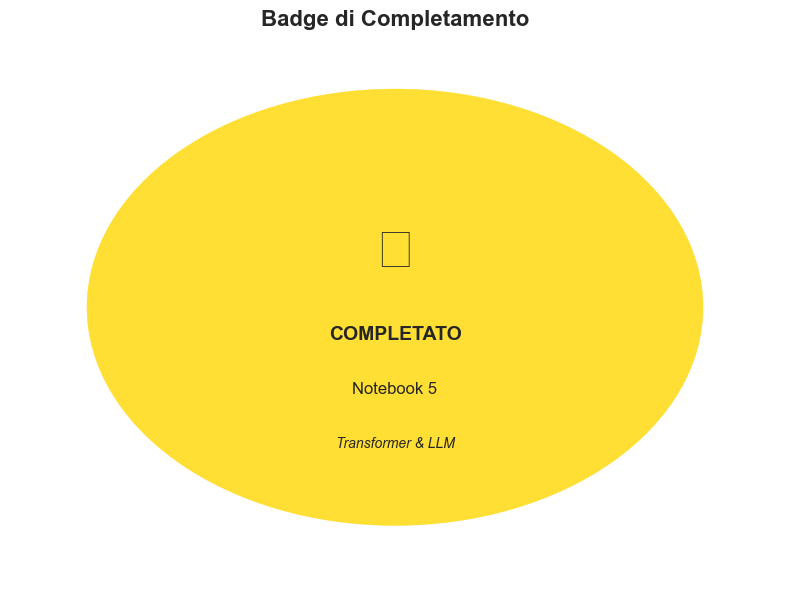


🔬 APPROFONDIMENTI AVANZATI (opzionali):
1. Transformer variants (BERT, T5, Switch Transformer)
2. Efficient attention mechanisms (Linformer, Performer)
3. Multimodal transformers (CLIP, DALL-E)
4. Scaling laws e emergent abilities
5. Constitutional AI e alignment

🎯 PROGETTI PRATICI SUGGERITI:
• Chatbot personalizzato
• Sistema di summarization
• Generatore di codice
• Assistente per scrittura
• Analizzatore di sentiment avanzato

🔮 FUTURO DEI TRANSFORMER:
   • Modelli sempre più grandi ed efficienti
   • Multimodalità avanzata (testo+immagini+audio+video)
   • Reasoning e planning più sofisticati
   • Integrazione con mondo fisico (robotica)
   • Verso l'Artificial General Intelligence (AGI)

🌍 IMPATTO SOCIALE:
   • Democratizzazione dell'accesso all'AI
   • Trasformazione del lavoro e dell'educazione
   • Nuove forme di creatività e collaborazione
   • Sfide etiche e di governance
   • Opportunità per risolvere problemi globali


In [9]:
# Riassunto finale
print("🎉 CONGRATULAZIONI! Hai completato il Notebook 5\n")

concetti_appresi = [
    "✅ Rivoluzione dei Transformer e superamento delle RNN",
    "✅ Meccanismo di Self-Attention e sua implementazione",
    "✅ Multi-Head Attention e specializzazione",
    "✅ Architettura completa dei Transformer",
    "✅ Positional Encoding e gestione sequenze",
    "✅ Large Language Models e loro caratteristiche",
    "✅ Strategie di generazione (greedy, sampling, temperature)",
    "✅ Applicazioni pratiche degli LLM",
    "✅ Utilizzo di modelli pre-addestrati",
    "✅ Considerazioni pratiche e limitazioni"
]

print("📚 CONCETTI APPRESI:")
for concetto in concetti_appresi:
    print(f"   {concetto}")

print("\n🛠️ COMPETENZE PRATICHE:")
competenze = [
    "🎯 Implementazione Self-Attention da zero",
    "🏗️ Costruzione architettura Transformer",
    "🤖 Utilizzo LLM pre-addestrati",
    "🎛️ Controllo strategie di generazione",
    "📝 Applicazione a task reali",
    "🔍 Analisi e interpretazione attention weights",
    "⚙️ Configurazione e ottimizzazione modelli"
]

for competenza in competenze:
    print(f"   {competenza}")

# Confronto finale architetture
print("\n📊 CONFRONTO FINALE ARCHITETTURE:")
df_final_comparison = pd.DataFrame({
    'Architettura': ['RNN', 'LSTM/GRU', 'Transformer'],
    'Parallelizzazione': ['No', 'No', 'Sì'],
    'Memoria Lungo Termine': ['Limitata', 'Buona', 'Eccellente'],
    'Velocità Training': ['Lenta', 'Media', 'Veloce'],
    'Scalabilità': ['Bassa', 'Media', 'Alta'],
    'Complessità': ['Bassa', 'Media', 'Alta'],
    'Stato Attuale': ['Legacy', 'Nicchia', 'Dominante']
})

print(df_final_comparison.to_string(index=False))

# Timeline evoluzione
print("\n📅 TIMELINE EVOLUZIONE AI GENERATIVA:")
timeline_completa = [
    "1986: RNN teorizzate",
    "1997: LSTM inventate", 
    "2014: GRU e Attention mechanisms",
    "2017: 'Attention Is All You Need' - Transformer",
    "2018: BERT rivoluziona NLP",
    "2019: GPT-2 mostra potenza generativa",
    "2020: GPT-3 breakthrough con 175B parametri",
    "2022: ChatGPT porta AI al mainstream",
    "2023: GPT-4 e modelli multimodali",
    "2024+: Era dell'AI Generativa matura"
]

for evento in timeline_completa:
    print(f"   {evento}")

print("\n🚀 PROSSIMI PASSI:")
print("   📖 Notebook 6: Vector Stores e RAG")
print("   📖 Notebook 7: Fine-tuning e Personalizzazione")
print("   📖 Notebook 8: Valutazione e Deployment")

print("\n💡 SUGGERIMENTI PER CONTINUARE:")
print("   • Sperimenta con diversi modelli pre-addestrati")
print("   • Prova prompt engineering avanzato")
print("   • Esplora fine-tuning per il tuo dominio")
print("   • Costruisci applicazioni pratiche")

print("\n🌟 RICORDA:")
print("   I Transformer hanno rivoluzionato l'AI e continuano")
print("   a evolversi rapidamente. Resta aggiornato e")
print("   sperimenta sempre con le nuove tecnologie!")

# Badge di completamento
fig, ax = plt.subplots(figsize=(8, 6))

circle = plt.Circle((0.5, 0.5), 0.4, color='gold', alpha=0.8)
ax.add_patch(circle)

ax.text(0.5, 0.6, '🚀', ha='center', va='center', fontsize=40)
ax.text(0.5, 0.45, 'COMPLETATO', ha='center', va='center', 
        fontsize=14, fontweight='bold')
ax.text(0.5, 0.35, 'Notebook 5', ha='center', va='center', 
        fontsize=12)
ax.text(0.5, 0.25, 'Transformer & LLM', ha='center', va='center', 
        fontsize=10, style='italic')

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('Badge di Completamento', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n🔬 APPROFONDIMENTI AVANZATI (opzionali):")
print("1. Transformer variants (BERT, T5, Switch Transformer)")
print("2. Efficient attention mechanisms (Linformer, Performer)")
print("3. Multimodal transformers (CLIP, DALL-E)")
print("4. Scaling laws e emergent abilities")
print("5. Constitutional AI e alignment")

print("\n🎯 PROGETTI PRATICI SUGGERITI:")
print("• Chatbot personalizzato")
print("• Sistema di summarization")
print("• Generatore di codice")
print("• Assistente per scrittura")
print("• Analizzatore di sentiment avanzato")

print("\n🔮 FUTURO DEI TRANSFORMER:")
print("   • Modelli sempre più grandi ed efficienti")
print("   • Multimodalità avanzata (testo+immagini+audio+video)")
print("   • Reasoning e planning più sofisticati")
print("   • Integrazione con mondo fisico (robotica)")
print("   • Verso l'Artificial General Intelligence (AGI)")

print("\n🌍 IMPATTO SOCIALE:")
print("   • Democratizzazione dell'accesso all'AI")
print("   • Trasformazione del lavoro e dell'educazione")
print("   • Nuove forme di creatività e collaborazione")
print("   • Sfide etiche e di governance")
print("   • Opportunità per risolvere problemi globali")

## 📝 Note e Riflessioni

Usa questa sezione per annotare le tue riflessioni:

**Le mie note sui Transformer:**

- 
- 
- 

**Domande per approfondire:**

- 
- 
- 

**Idee per progetti:**

- 
- 
- 

**Applicazioni interessanti:**

- 
- 
- 